For this experiment we will first explore the data and look for possible correlation between various parameters and the average time a horse took around the track. By analysing this correlation we will then make a hypothesis for e.g. a certain breed of horse from a certain country performs way better than the other. Finally we will do a hypothesis test to check whether or not our hypothesis is correct or not.

P.S.
1. For the average time we will only consider only the first 3 sections as times for them will be present for all the runs. 
2. We will accept any hypothesis to be true only if there is a 5% chance of that event. 
3. We will be using a one-tailed test as we are only interested in observing whether the average time is significantly lower or not.

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [40]:
runs = pd.read_csv("runs.csv")
runs.head(10)

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154
5,0,6,3296,3,0.0,1.25,3,NZ,Gelding,60,...,22.03,22.90,23.57,NaN,NaN,82.83,7.0,1.8,54,34
6,0,7,911,12,0.0,9.50,3,NZ,Gelding,60,...,21.59,23.94,25.09,NaN,NaN,84.15,99.0,28.0,55,149
7,0,8,2170,1,1.0,0.00,3,AUS,Gelding,60,...,21.87,23.58,23.06,NaN,NaN,82.64,12.0,3.6,47,183
8,0,9,1730,13,0.0,9.75,3,NZ,Gelding,60,...,21.71,23.90,24.94,NaN,NaN,84.20,38.0,13.0,75,131
9,0,10,2998,14,0.0,999.00,3,AUS,Mare,60,...,22.31,24.38,30.46,NaN,NaN,92.20,39.0,12.0,109,145


Age might be an important factor in a horse's speed. So, Lets calculate average run times and number of horses in each age category and then choose an age for our experiment as age can be a lurking variable

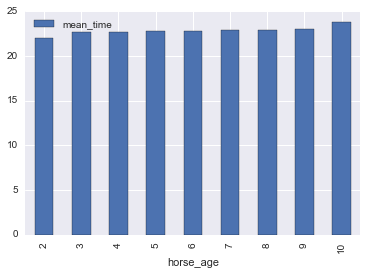

In [41]:
grp_age = runs[['horse_age', 'time1', 'time2', 'time3']].groupby('horse_age').mean()
grp_age['mean_time'] = (grp_age['time1'] + grp_age['time2'] + grp_age['time3'])/3
grp_age[['mean_time']].plot.bar()

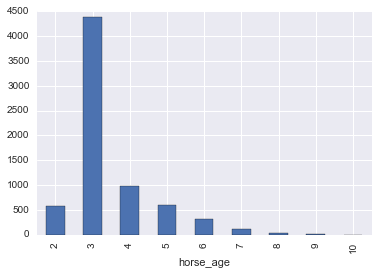

In [42]:
uni_horse_age = runs[['horse_age', 'horse_id']].groupby('horse_age').horse_id.nunique()
uni_horse_age.plot.bar()

Choosing horses of age 3 will be better because it will allow for more possibe combinations and also allows us to take larger sample size for the hypothesis.

In [44]:
runs = runs[runs.horse_age == 3][['horse_country', 'horse_type', 'horse_gear', 'declared_weight', 'actual_weight',\
                                  'time1', 'time2', 'time3', 'horse_age']]

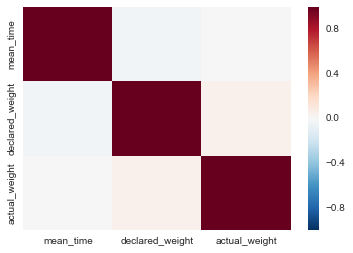

In [45]:
runs['mean_time'] = (runs['time1'] + runs['time2'] + runs['time3']) / 3
sns.heatmap(runs[['mean_time', 'declared_weight', 'actual_weight']].corr())

In [46]:
runs[['mean_time', 'declared_weight', 'actual_weight']].corr()

,mean_time,declared_weight,actual_weight
mean_time,1.000000,-0.036746,0.003908
declared_weight,-0.036746,1.000000,0.049013
actual_weight,0.003908,0.049013,1.000000


An interesting thing to observe here is that the declared_weight and mean_time are negatively correlated, this would mean that as the declared weight goes up there a good chance that average time would go down.

Anyway the correlations are not strong enough that they can be used to suggest anything.

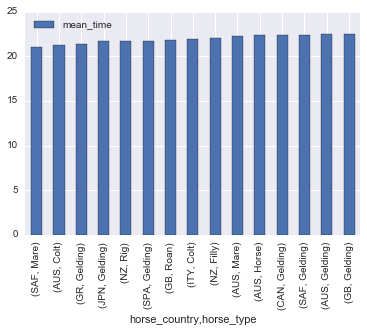

In [117]:
# horse_country', 'horse_type', 'horse_gear'
grp_country = runs[['horse_country','horse_type', 'mean_time']].dropna().groupby(['horse_country','horse_type']).mean()
grp_country[['mean_time']].sort_values('mean_time').head(15).plot.bar()

In [120]:
# Lets see how many observation points we have
runs[(runs.horse_country == 'SAF') & (runs.horse_type == 'Mare')]

,horse_country,horse_type,horse_gear,declared_weight,actual_weight,time1,time2,time3,horse_age,mean_time
12249,SAF,Mare,--,1155.0,128,13.23,21.16,22.90,3,19.096667
13074,SAF,Mare,--,1129.0,132,13.39,20.59,22.77,3,18.916667
13908,SAF,Mare,--,1118.0,114,12.59,21.47,22.24,3,18.766667
14815,SAF,Mare,--,1123.0,129,23.59,22.41,23.85,3,23.283333
15465,SAF,Mare,--,1120.0,115,13.36,20.91,21.89,3,18.720000
16752,SAF,Mare,--,1137.0,120,23.98,22.31,23.02,3,23.103333
19325,SAF,Mare,--,1153.0,115,13.30,20.45,22.40,3,18.716667
20001,SAF,Mare,--,1147.0,123,24.32,22.30,22.36,3,22.993333
20830,SAF,Mare,--,1148.0,119,23.57,22.62,23.69,3,23.293333
21858,SAF,Mare,--,1153.0,130,24.07,22.61,23.70,3,23.460000


## Hypothesis: If all the horses are of type 'Mare' from 'SAF' then the average time around track will decrease

In [124]:
runs.mean_time.describe()

count    61212.000000
mean        22.634066
std          3.749730
min         18.386667
25%         20.110000
50%         23.450000
75%         24.236667
max        673.906667
Name: mean_time, dtype: float64

In [125]:
runs.mean_time.std()

3.7497301564083223

In [126]:
runs[(runs.horse_country == 'SAF') & (runs.horse_type == 'Mare')].mean_time.describe()

count    15.000000
mean     21.078000
std       2.526171
min      18.640000
25%      18.835000
50%      19.243333
75%      23.251667
max      25.813333
Name: mean_time, dtype: float64

The population parameters are 

 - AVG : 22.634  
 - SD: 3.745

The sample values are

 - Sample Size : 15
 - Sample mean : 21.078
 - Standard Error : 0.967
 - Z-value : -1.61 (approx)
 - p-value : 0.0537

Even though the hypothesis failed, we did end up pretty close to it (missed it by .37%). So we can still say there is a good chance that betting on a Mare from South Africa (I assume SAF is South Africa) will lead to good returns